/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Original Text:
 
    Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.
    Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
    Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem-solving".
    As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.
    A quip in Tesler's Theorem says "AI is whatever hasn't been done yet."
    For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.
    Modern machine capabili

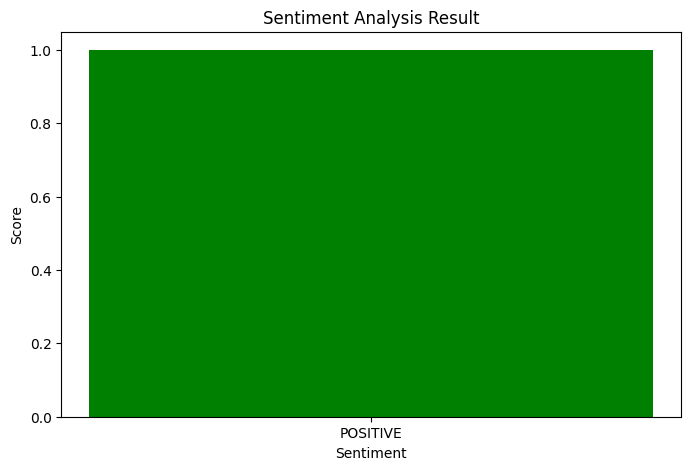

'The morning sun spilled golden light across the horizon, promising a beautiful day ahead. Laughter filled the air as friends gathered for brunch,\nsharing stories and creating memories that would last a lifetime.\nEach moment was infused with joy, from the warmth of a shared smile to the comforting aroma of freshly brewed coffee.\nInspiration flowed freely as creativity sparked during conversations, igniting new ideas and dreams.\nAs the day unfolded, every little detail seemed to shine brighter,\nreminding everyone that life is a wonderful journey filled with opportunities and endless possibilities.\nGratitude filled the hearts of those present, making even the simplest moments feel extraordinary.'

In [ ]:
# Import necessary libraries
import torch
from transformers import BartTokenizer, BartForConditionalGeneration, pipeline
import spacy
import random
import matplotlib.pyplot as plt

# Load pre-trained model and tokenizer for summarization
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Load pre-trained pipeline for sentiment analysis
sentiment_model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_analysis = pipeline("sentiment-analysis", model=sentiment_model_name, revision="af0f99b")

# Load spaCy model for POS tagging
nlp = spacy.load("en_core_web_sm")

# Define positive suggestions for different themes
positive_suggestions = {
    "stress": [
        "Take deep breaths and try to relax. Everything will be okay.",
        "Remember to take breaks and give yourself time to unwind.",
        "Consider practicing mindfulness or meditation to reduce stress."
    ],
    "frustration": [
        "Keep pushing forward, and remember that persistence pays off.",
        "Try to break down the problem into smaller, manageable tasks.",
        "Sometimes, taking a short break can help clear your mind."
    ],
    "sadness": [
        "It's okay to feel sad sometimes. Talk to a friend or loved one.",
        "Engage in activities that bring you joy and lift your spirits.",
        "Remember that this feeling is temporary and things will get better."
    ],
    "general": [
        "Keep a positive mindset and things will improve.",
        "Believe in yourself and your abilities.",
        "Focus on the good things in life."
    ]
}

# Define the summarization function
def summarize_text(text, max_length=130, min_length=30, do_sample=False):
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(
        inputs['input_ids'],
        max_length=max_length,
        min_length=min_length,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True,
        do_sample=do_sample
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Define the sentiment analysis function
def analyze_sentiment(text):
    return sentiment_analysis(text)

# Define the POS tagging function
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Define the function to provide positive suggestions based on context
def provide_positive_suggestion(text, sentiment_result):
    # Analyze text to determine the context of the negative sentiment
    if "stress" in text.lower():
        theme = "stress"
    elif "frustrated" in text.lower() or "frustration" in text.lower():
        theme = "frustration"
    elif "sad" in text.lower() or "sadness" in text.lower():
        theme = "sadness"
    else:
        theme = "general"

    for result in sentiment_result:
        if result['label'] == 'NEGATIVE':
            return random.choice(positive_suggestions[theme])
    return None

# Define the function to plot sentiment analysis
def plot_sentiment(sentiment_result):
    labels = [result['label'] for result in sentiment_result]
    scores = [result['score'] for result in sentiment_result]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, scores, color=['green' if label == 'POSITIVE' else 'red' for label in labels])
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.title('Sentiment Analysis Result')
    plt.show()

# Main function to demonstrate example usage
if __name__ == "__main__":
    # Example large text
    text = """
    Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.
    Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
    Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem-solving".
    As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.
    A quip in Tesler's Theorem says "AI is whatever hasn't been done yet."
    For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.
    Modern machine capabilities generally classified as AI include successfully understanding human speech, competing at the highest level in strategic game systems (such as chess and Go), autonomously operating cars, intelligent routing in content delivery networks, and military simulations.
    """

    summary = summarize_text(text)
    print("Original Text:\n", text)
    print("\nSummarized Text:\n", summary)

    # Allow user to input their own text
    user_input = input("\nEnter the text you want to summarize, analyze sentiment, and POS tag:\n")

    user_summary = summarize_text(user_input)
    print("\nSummarized User Text:\n", user_summary)

    sentiment = analyze_sentiment(user_input)
    print("\nSentiment Analysis of User Text:\n", sentiment)

    pos_tags = pos_tagging(user_input)
    print("\nPOS Tagging of User Text:\n", pos_tags)

    positive_suggestion = provide_positive_suggestion(user_input, sentiment)
    if positive_suggestion:
        print("\nPositive Suggestion:\n", positive_suggestion)

    plot_sentiment(sentiment)

# NEGATIVE
'''Dark clouds loomed overhead, suffocating any glimmer of light.
The silence felt heavy, a reminder of the isolation that gnawed at the soul.
Anger bubbled just beneath the surface, ready to erupt at the slightest provocation.
Memories of betrayal haunted every thought, while disappointment hung like a shadow, twisting joy into bitterness.
The future appeared bleak, a never-ending cycle of despair where hope felt like a cruel joke.
In this suffocating gloom, every breath became a struggle, and happiness seemed like a distant, unattainable dream.'''

# POSITIVE
'''The morning sun spilled golden light across the horizon, promising a beautiful day ahead. Laughter filled the air as friends gathered for brunch,
sharing stories and creating memories that would last a lifetime.
Each moment was infused with joy, from the warmth of a shared smile to the comforting aroma of freshly brewed coffee.
Inspiration flowed freely as creativity sparked during conversations, igniting new ideas and dreams.
As the day unfolded, every little detail seemed to shine brighter,
reminding everyone that life is a wonderful journey filled with opportunities and endless possibilities.
Gratitude filled the hearts of those present, making even the simplest moments feel extraordinary.'''



Original Text:
 
    Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.
    Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
    Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem-solving".
    As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.
    A quip in Tesler's Theorem says "AI is whatever hasn't been done yet."
    For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.
    Modern machine capabili

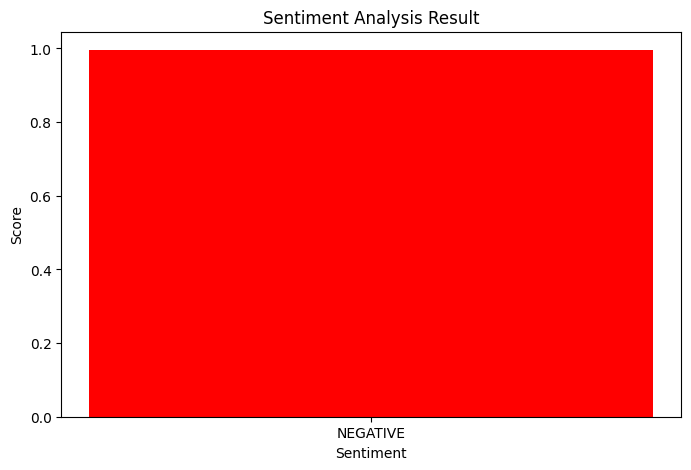

'The morning sun spilled golden light across the horizon, promising a beautiful day ahead. Laughter filled the air as friends gathered for brunch,\nsharing stories and creating memories that would last a lifetime.\nEach moment was infused with joy, from the warmth of a shared smile to the comforting aroma of freshly brewed coffee.\nInspiration flowed freely as creativity sparked during conversations, igniting new ideas and dreams.\nAs the day unfolded, every little detail seemed to shine brighter,\nreminding everyone that life is a wonderful journey filled with opportunities and endless possibilities.\nGratitude filled the hearts of those present, making even the simplest moments feel extraordinary.'

In [ ]:
# Import necessary libraries
import torch
from transformers import BartTokenizer, BartForConditionalGeneration, pipeline
import spacy
import random
import matplotlib.pyplot as plt

# Load pre-trained model and tokenizer for summarization
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Load pre-trained pipeline for sentiment analysis
sentiment_model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_analysis = pipeline("sentiment-analysis", model=sentiment_model_name, revision="af0f99b")

# Load spaCy model for POS tagging
nlp = spacy.load("en_core_web_sm")

# Define positive suggestions for different themes
positive_suggestions = {
    "stress": [
        "Take deep breaths and try to relax. Everything will be okay.",
        "Remember to take breaks and give yourself time to unwind.",
        "Consider practicing mindfulness or meditation to reduce stress."
    ],
    "frustration": [
        "Keep pushing forward, and remember that persistence pays off.",
        "Try to break down the problem into smaller, manageable tasks.",
        "Sometimes, taking a short break can help clear your mind."
    ],
    "sadness": [
        "It's okay to feel sad sometimes. Talk to a friend or loved one.",
        "Engage in activities that bring you joy and lift your spirits.",
        "Remember that this feeling is temporary and things will get better."
    ],
    "general": [
        "Keep a positive mindset and things will improve.",
        "Believe in yourself and your abilities.",
        "Focus on the good things in life."
    ]
}

# Define the summarization function
def summarize_text(text, max_length=130, min_length=30, do_sample=False):
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(
        inputs['input_ids'],
        max_length=max_length,
        min_length=min_length,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True,
        do_sample=do_sample
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Define the sentiment analysis function
def analyze_sentiment(text):
    return sentiment_analysis(text)

# Define the POS tagging function
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Define the function to provide positive suggestions based on context
def provide_positive_suggestion(text, sentiment_result):
    # Analyze text to determine the context of the negative sentiment
    if "stress" in text.lower():
        theme = "stress"
    elif "frustrated" in text.lower() or "frustration" in text.lower():
        theme = "frustration"
    elif "sad" in text.lower() or "sadness" in text.lower():
        theme = "sadness"
    else:
        theme = "general"

    for result in sentiment_result:
        if result['label'] == 'NEGATIVE':
            return random.choice(positive_suggestions[theme])
    return None

# Define the function to plot sentiment analysis
def plot_sentiment(sentiment_result):
    labels = [result['label'] for result in sentiment_result]
    scores = [result['score'] for result in sentiment_result]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, scores, color=['green' if label == 'POSITIVE' else 'red' for label in labels])
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.title('Sentiment Analysis Result')
    plt.show()

# Main function to demonstrate example usage
if __name__ == "__main__":
    # Example large text
    text = """
    Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.
    Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
    Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem-solving".
    As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.
    A quip in Tesler's Theorem says "AI is whatever hasn't been done yet."
    For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.
    Modern machine capabilities generally classified as AI include successfully understanding human speech, competing at the highest level in strategic game systems (such as chess and Go), autonomously operating cars, intelligent routing in content delivery networks, and military simulations.
    """

    summary = summarize_text(text)
    print("Original Text:\n", text)
    print("\nSummarized Text:\n", summary)

    # Allow user to input their own text
    user_input = input("\nEnter the text you want to summarize, analyze sentiment, and POS tag:\n")

    user_summary = summarize_text(user_input)
    print("\nSummarized User Text:\n", user_summary)

    sentiment = analyze_sentiment(user_input)
    print("\nSentiment Analysis of User Text:\n", sentiment)

    pos_tags = pos_tagging(user_input)
    print("\nPOS Tagging of User Text:\n", pos_tags)

    positive_suggestion = provide_positive_suggestion(user_input, sentiment)
    if positive_suggestion:
        print("\nPositive Suggestion:\n", positive_suggestion)

    plot_sentiment(sentiment)

# NEGATIVE
'''Dark clouds loomed overhead, suffocating any glimmer of light.
The silence felt heavy, a reminder of the isolation that gnawed at the soul.
Anger bubbled just beneath the surface, ready to erupt at the slightest provocation.
Memories of betrayal haunted every thought, while disappointment hung like a shadow, twisting joy into bitterness.
The future appeared bleak, a never-ending cycle of despair where hope felt like a cruel joke.
In this suffocating gloom, every breath became a struggle, and happiness seemed like a distant, unattainable dream.'''

# POSITIVE
'''The morning sun spilled golden light across the horizon, promising a beautiful day ahead. Laughter filled the air as friends gathered for brunch,
sharing stories and creating memories that would last a lifetime.
Each moment was infused with joy, from the warmth of a shared smile to the comforting aroma of freshly brewed coffee.
Inspiration flowed freely as creativity sparked during conversations, igniting new ideas and dreams.
As the day unfolded, every little detail seemed to shine brighter,
reminding everyone that life is a wonderful journey filled with opportunities and endless possibilities.
Gratitude filled the hearts of those present, making even the simplest moments feel extraordinary.'''

